# STATGR 5243, Project 1
 
# Finding the Pursuit of Happiness - EDA and NLP Analyses of HappyDB: A Corpus of 100,000 Crowdsourced Happy Moments

##### "True happiness is to enjoy the present, without anxious dependence upon the future..."
##### - Lucius Annaeus Seneca

In [229]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Part I: Which people are behind the Happy Moments corpus? 

#### Before analyzing the happy moments themselves, it is important to identify the demographic information of those individuals who provided the crowd-sourced happy moments. Understanding the demographic information will help us to better understand who exactly is contributing to the corpus of moments, and will aid in helping ot make inferences about the data. 

## We begin by importing the data.

In [166]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/cleaned_hm.csv'))
df.head(2)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection


In [167]:
df_sense = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/senselabel (2).csv'))
df_sense.head(2)

,hmid,tokenOffset,word,lowercaseLemma,POS,MWE,offsetParent,supersenseLabel
0,31526,1,I,i,PRON,O,0,NaN
1,31526,2,found,find,VERB,O,0,v.cognition


In [168]:
df_demo = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/demographic (1).csv'))
df_demo.head(2)


,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y


In [169]:
print(df_demo.shape)

(10844, 6)


### Further, we will remove Null values from the demographic data. 

In [170]:
df_demo_nonan = df_demo.dropna(how='any')

In [171]:
df_demo_nonan.shape

(10689, 6)

#### Note- I also imported a separate dataframe for plotting age demographcis, as manipulating some of the data was easier to perform in Excel and then re-import in Jupyter Notebook.

In [172]:
df_demo_age = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/demo_age.csv'))

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Age Distribution')

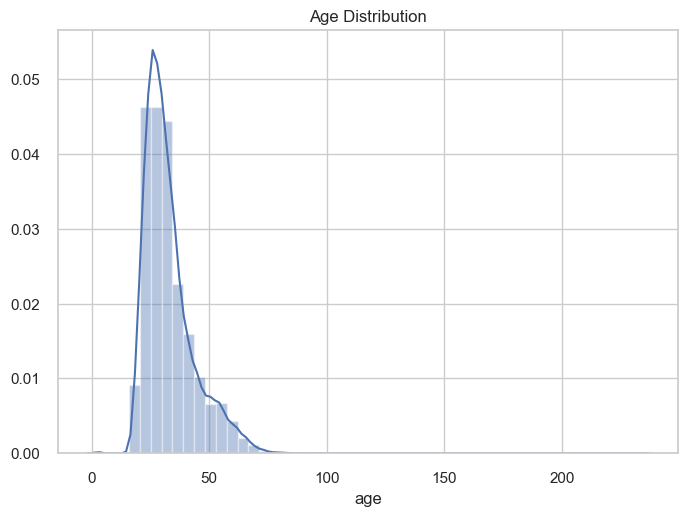

In [174]:
df_demo_age = df_demo_age.dropna()
sns.distplot(df_demo_age['age'])
plt.title('Age Distribution')

In [175]:
df_demo_nonan.head(2)

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y


In [176]:
import pandas_profiling

In [177]:
pandas_profiling.ProfileReport(df_demo_nonan)

Number of variables,7
Number of observations,10689
Total Missing (%),0.0%
Total size in memory,584.6 KiB
Average record size in memory,56.0 B
Numeric,1
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## By using the Pandas Profiling tool, we ascertain a much better understanding of the demographics of those individuals putting forth their happy moments. Key take aways are as follows: 

##### A. Slightly right skewed age distribution, with the mean centering around 25. 
##### B. Overwhelming majority of the individuals are American (~86%), followed by individuals who are Indian (9%).
##### C. Almost 50-50 split between males and females. 
##### D. Slightly above 50% of those individuals sampled are single, followed by ~40% of individuals who are married, lastly followed by ~5% of individuals who are divorced. 
##### E. ~60% of those sampled do not have children, while ~40% of those sampled do have children. 


## Part II: What observations can we make about individuals' happy moments from a peripheral level?

#### Now that we have an understanding of those individuals whose happy moments comprise our corpus, it would be beneficial to identify certain facts about the happy moments themselves. 

#### The other two datasets provided in the analysis can help provide us with this information. 

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Length of Happy Moment - Distribution')

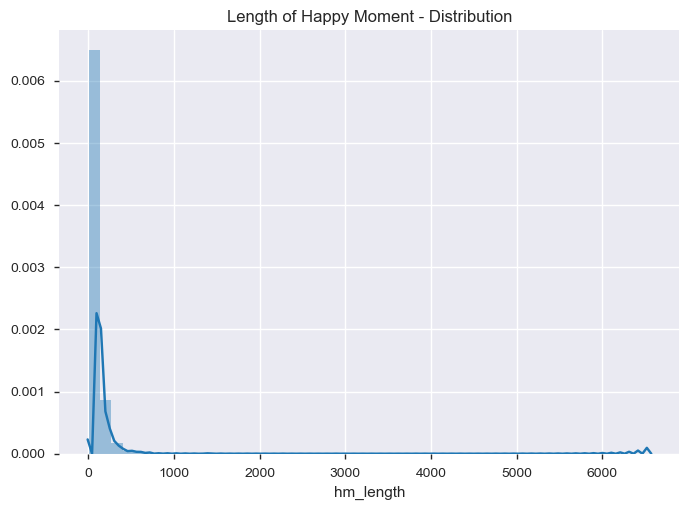

In [178]:
df['hm_length']  = df['cleaned_hm'].str.len()
sns.distplot(df['hm_length'])
plt.title('Length of Happy Moment - Distribution')

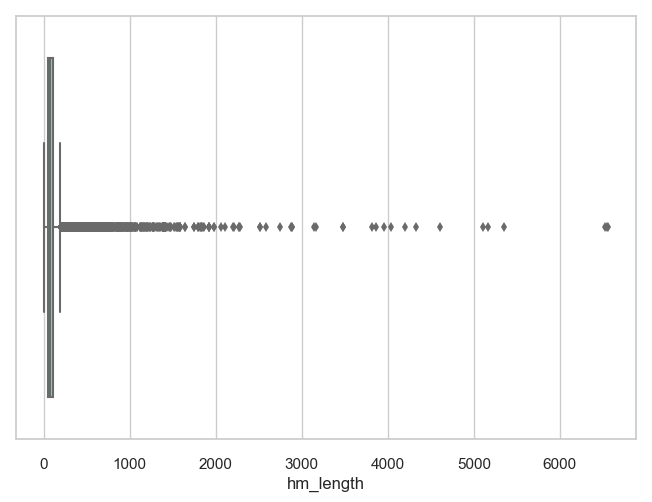

In [179]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="hm_length", hue="reflection_period",data=df, palette="Set3")

## From the above two plots, we see that the majority of happy moments are under 1000 words, closer to 0 words than 1000. There remain a several outliers that persist in the 2000-6000 word range. 

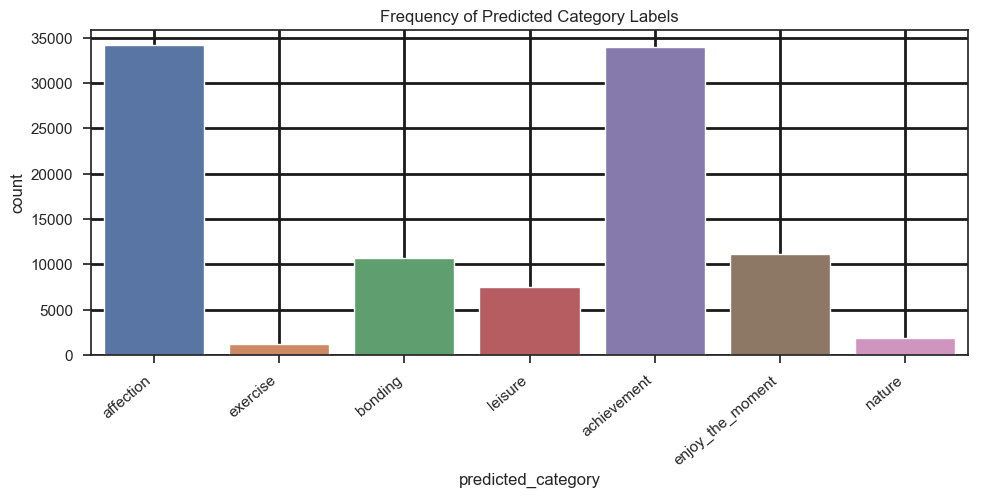

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="predicted_category", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_axisbelow(True)
plt.tight_layout()
plt.title("Frequency of Predicted Category Labels")
plt.grid(True, color='k', linestyle='-', linewidth=2)
plt.show()

###  We can make another interesting observation from the 'predicted_category' field from the cleaned_hm dataset (here noted as df). We see here that 'affection' and 'achievement' are by far the most predicted categories. These two are followed by 'bonding', 'enjoy_the_moment', and 'leisure'. 

##### 'nature' and 'exercise' by comparison, are the least frequent predicted category label. 

Text(0.5,1,'Length of Happy Moment by Predicted Category')

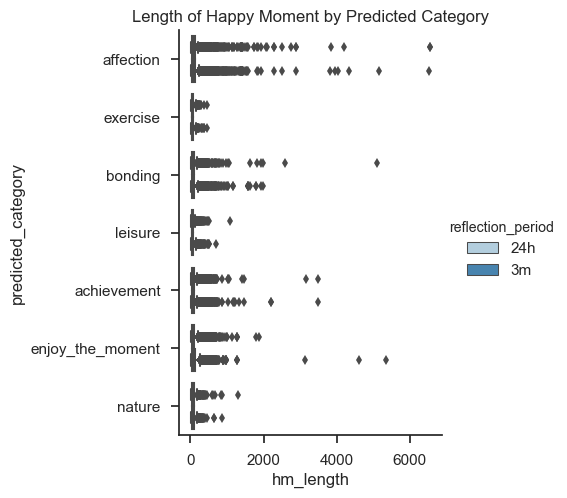

In [181]:
sns.catplot(x="hm_length", y="predicted_category",kind='box',hue='reflection_period', palette="Blues",data=df)
figsize=(50,50)
plt.title('Length of Happy Moment by Predicted Category')

## Analyzing the frequency of 'predicted_category' provides us with interesting observations. We can add a second layer to this analysis by comparing the frequency of 'predicted_category' with the length of the happy moments. 

## While the length of 'affection' matches that of what we would expect based on the previous chart, we notice that the length of achievement seems small compared to its frequency in the data. The length of 'achievement' is highly similar to that of 'enjoy_the_moment' and 'bonding'.

Text(0.5,1,'Frequency of Different POS')

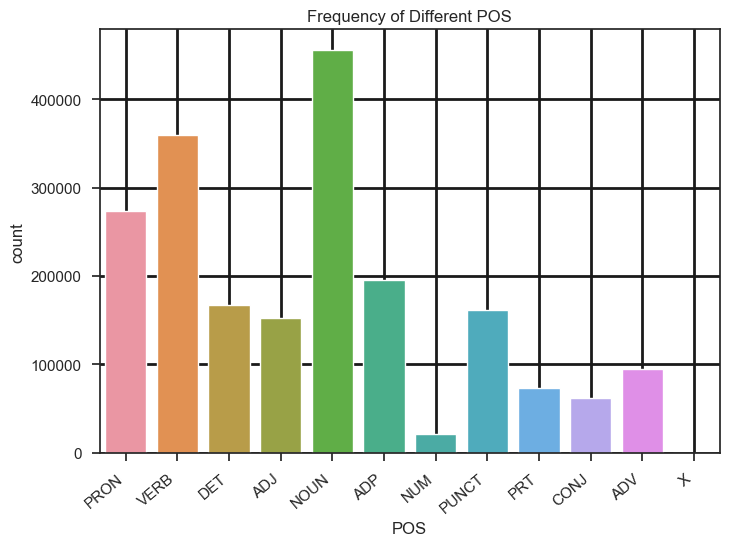

In [182]:
ax = sns.countplot(x="POS", data=df_sense)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.grid(True, color='k', linestyle='-', linewidth=2)
plt.title('Frequency of Different POS')

## From the above plot, we can see the frequencies of different POS throughout the dataset. Perhaps not surprisingly, 'Noun', 'Verb', and 'Pron' are the most frequent POS. This implies that people are happy when they interact with a state or object, or when they interact with other people involving states or objects. 

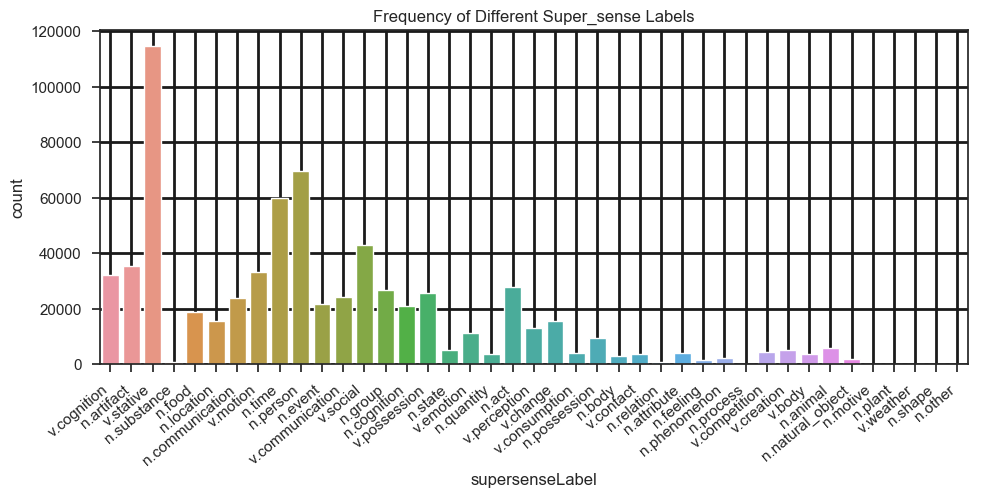

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="supersenseLabel", data=df_sense)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Frequency of Different Super_sense Labels")
plt.grid(True, color='k', linestyle='-', linewidth=2)
plt.show()

## Our observation from the above POS_histogram are confirmed by the supersenseLabel histogram depicted above. We see that 'v.stative', 'n.people', and 'n.time' contain the highest counts among all supersense labels. Moreover, we can infer that the most frequent happy moments involve spending time with other people aside from one's self, and that these actions entail a state of being/mind, rather than actions. 

## By looking at the plot however, we can also see that 'v.motion' and 'n.act' are present as well, allowing us to conclude that these two are also non-trivial in comprising happy moments. 

## Now that we have analyzed the demographics behind the people who provided their happy moments, and the actual happy moments themselves, we can try to algorithmically identify which happy moments are grouped together. 

## To accomplish this task, we implement the below algorithms:

### A. TF_IDF Vectorization
### B. K_Means Clustering
### C. LDA Topic Modeling 

## Before we implement algorithms to analyze the textual data comprising the happy moments, we must first pre-process the text data. Pre-processing steps entail:

### A. Turning all letters to lowercase
### B. Tokenizing the happy moments 
### C. Removing stop words from the happy moments 
### D. Lemmatizing the happy moments

In [184]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/cleaned_hm.csv'))


In [185]:
import string
df['cleaned_hm'] = [i.lower() for i in df['cleaned_hm']]
#new_list = [expression(i) for i in old_list if filter(i)]

In [186]:
df['cleaned_hm'] = [i.translate(string.punctuation) for i in df['cleaned_hm']]

In [187]:

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

def preprocess(sentence):
	sentence = sentence.lower()
	tokenizer = RegexpTokenizer(r'\w+')
	tokens = tokenizer.tokenize(sentence)
	filtered_words = [w for w in tokens if not w in stopwords.words('english')]
	return " ".join(filtered_words)

In [188]:
df_small = df[:10000]

In [189]:
df_small['cleaned_hm'] = [preprocess(x) for x in df_small['cleaned_hm']]

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [190]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()
df_small['cleaned_hm'] = [lemmatizer.lemmatize(word) for word in df_small['cleaned_hm']]

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [191]:
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize
lemma=nltk.stem.WordNetLemmatizer()

lemma_books = []
for book in df_small['cleaned_hm']:
    lemma_book = [lemma.lemmatize(word) for word in wordpunct_tokenize(book)]
    lemma_book = (' ').join(lemma_book)
    lemma_books.append(lemma_book)

## Now that the textual data has been preprocessed, we can proceed with our TF_IDF vectorization of the corpus. We will use sklearn's TfidfVectorizer to accomplish this task. 

#### Note: Grid searching for optimal parameters of these algorithms was out_of_scope for this study. 

In [192]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(lemma_books).toarray()
vocab = np.array(vectorizer.get_feature_names())
dtm.shape

(1000, 2574)

## By creating a dictionary of the vectorized featre names and vectorizer.idf, we can create a data frame that shows different scores from the vectorization. 

### Not surprisingly, 'happy', 'got', 'went', 'made', and 'friend', were all some of the most frequently accounted for words in the corpus' vocabulary. The frequency of these words contrasts with 'rainbow' and 'tulip', which were used much more infrequently. This seems appropriate given that these nouns do not occur frequently in everyday life. 

In [193]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [194]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
happy,2.858899
got,2.967112
went,3.235926
made,3.254794
friend,3.334044
work,3.539307
time,3.591267
today,3.618295
morning,3.632089
new,3.674648


In [195]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
tulip,7.215608
rainbow,7.215608
soca,7.215608
smoking,7.215608
healthier,7.215608
focal,7.215608
motion,7.215608
benched,7.215608
imagined,7.215608
coffe,7.215608


In [196]:
from sklearn.decomposition import TruncatedSVD

In [197]:
n_comp=7

In [198]:
vz_sample = vectorizer.fit_transform(list(lemma_books))

## We can plot our vectorized corpus using the Truncated SVD and TSNE models (set to two components for a 2-d view). 7 components were chosen given that there are 7 predicted cateogry labels. 

In [199]:
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(vz_sample)


In [200]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)

In [201]:
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.036380
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.849892
[t-SNE] Error after 500 iterations: 0.807902


In [202]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file
output_notebook()

plot_tfidf = bp.figure(plot_width=700, plot_height=600,
                       title="tf-idf clustering of the item description",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)


Loading BokehJS ...

In [203]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])

In [204]:
tfidf_df['description'] = lemma_books

In [205]:
plot_tfidf.scatter(x='x', y='y', source=tfidf_df, alpha=0.7)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"description": "@description"}
show(plot_tfidf)

## Using the bokeh library, we can develop a scatter plot visualization showing each happy moment and it's description. The Tf_idf algorithm does an adequate job in separating each happy moment into clusters. 



## But can we do better? The below cells detail the use of the MiniBatchKmeans algorithm to cluster our happy moments together. This time, 13 clusters are used as the results were semantically better than compared to using 7 clusters used previously. 

In [206]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 13 # need to be selected wisely
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000)

In [207]:
kmeans = kmeans_model.fit(vz_sample)
kmeans_clusters = kmeans.predict(vz_sample)
kmeans_distances = kmeans.transform(vz_sample)
# reduce dimension to 2 using tsne
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.012971
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.518837
[t-SNE] Error after 500 iterations: 0.753083


In [208]:
#combined_sample.reset_index(drop=True, inplace=True)
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['description'] = tfidf_df['description']

#kmeans_df['cluster']=kmeans_df.cluster.astype(str).astype('category')

In [209]:
plot_kmeans = bp.figure(plot_width=700, plot_height=600,
                        title="KMeans clustering of the description",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [210]:
label_color_map = {0:'lightgrey',
                1:'lightcoral',
                2:'sandybrown',
                3:'papayawhip',
                4:'lemonchiffon',
                5:'darkkhaki',
                6:'yellow',
                7:'greenyellow',
                8:'lightgreen',
                9:'aquamarine',
                10:'darkkhaki',
                11:'deepskyblue',
                12:'dodgerblue',
                13:'navy',
                14:'blueviolet'}




#### label colors here: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

In [211]:
label_color = [label_color_map[l] for l in kmeans_model.labels_] 

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from bokeh.models import HoverTool, DatetimeTickFormatter,ColumnDataSource
source = ColumnDataSource(data=dict(x=kmeans_df['x'], y=kmeans_df['y'],
                                    #color=colormap[kmeans_clusters],
                                    color=label_color,
                                    description=kmeans_df['description'],
                                    cluster=kmeans_df['cluster']))

plot_kmeans.scatter(x='x', y='y', color='color', source=source)
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"description": "@description"}
show(plot_kmeans)

## We see that the Kmeans algorithm does a much better job in clearly separating the happy moments from those that are dissimilar to it. The clusters are color coded and are clearly separable. 

## By looking at the descriptions, we can observe that the Kmeans algorithm significantly takes into account verbs when clustering the data. i.e. made, went. 

### Below, we see words associated with the first 12 clusters. 

In [214]:
common_words = kmeans_model.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(vocab[word] for word in centroid))

0 : able, daughter, finally, great, good, mile, found, morning, run, really
1 : time, hour, today, happy, first, made, long, one, 24, got
2 : friend, new, bought, online, old, got, birthday, met, laptop, game
3 : enjoyed, lot, family, perfect, yesterday, soccer, run, morning, went, weather
4 : dinner, delicious, husband, ate, made, food, eat, favorite, good, family
5 : saw, working, house, project, finished, work, yesterday, home, seen, happy
6 : got, hug, received, gave, job, big, morning, work, bonus, yesterday
7 : went, gym, family, friend, park, fun, shopping, great, restaurant, local
8 : happy, wife, work, made, came, home, nice, morning, see, got
9 : night, last, watched, game, show, tv, friend, favorite, movie, video
10 : walk, day, beautiful, dog, took, went, morning, played, long, around
11 : felt, happy, lunch, getting, made, fry, even, grade, got, asked
12 : phone, talked, talking, mother, plan, girlfriend, call, boyfriend, new, ex


## Lastly, we can implement a LDA topic model to see if it performs better than our Kmeans clustering. 

## For this analysis, 9 topics were chosen as this number generated more clearly seprable topics than 7 as used in Tf_idf, and 13 as used in Kmeans. 

In [215]:
from sklearn.decomposition import LatentDirichletAllocation

In [216]:
from sklearn.feature_extraction.text import CountVectorizer
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model

no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(lemma_books)
tf_feature_names = tf_vectorizer.get_feature_names()

In [217]:
no_topics = 9

lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [218]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(topic_idx)
        print([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])

In [219]:
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

0
['yard', 'tree', 'nice', 'cat', 'able', 'snuggled', 'fly', 'flight', 'view', 'make']
1
['new', 'got', 'bought', 'finally', 'job', 'husband', 'month', 'gift', 'really', 'look']
2
['tv', 'press', 'bench', 'watched', 'max', 'lap', 'medicine', 'final', 'ordered', 'came']
3
['able', 'work', 'friend', 'good', 'dinner', 'home', 'night', 'came', 'got', 'went']
4
['happy', 'got', 'hour', 'work', 'felt', 'yesterday', 'morning', 'year', 'today', 'make']
5
['game', 'friend', 'playing', 'today', 'time', 'met', 'told', 'online', 'college', 'minute']
6
['went', 'today', 'morning', 'day', 'enjoyed', 'time', 'husband', 'movie', 'friend', 'walk']
7
['happiness', 'feeling', 'eye', 'train', 'life', 'people', 'sun', 'help', 'time', 'food']
8
['run', 'feel', 'daughter', 'mile', 'able', 'make', 'finally', 'great', 'feeling', 'think']


In [220]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      22.163395        1       1  0.116144  0.005417
6      21.463132        1       2  0.114446  0.040347
4      17.261177        1       3  0.073385  0.013718
7      11.326983        1       4 -0.098980  0.124566
5       9.591974        1       5  0.035241 -0.096316
1       8.608408        1       6 -0.091085 -0.120349
8       4.206790        1       7 -0.050300  0.028668
0       3.000766        1       8 -0.041263  0.010900
2       2.377376        1       9 -0.057589 -0.006950, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
357   Default  142.000000         happy  142.000000  30.0000  30.0000
536   Default   56.000000           new   56.000000  29.0000  29.0000
334   Default  110.000000           got  110.000000  28.0000  28.0000
316   Default   26.000000          game   26.000000  27.0000  27.0000
15    Default   50.000000          able   50.000000  26.0000  26.0000
312   Default   80.000000        friend   80.000000  25.0000  25.0000
386   Default   36.000000          hour   36.000000  24.0000  24.0000
858   Default   61.000000         today   61.000000  23.0000  23.0000
215   Default   33.000000        dinner   33.000000  22.0000  22.0000
705   Default   13.000000           run   13.000000  21.0000  21.0000
928   Default   87.000000          went   87.000000  20.0000  20.0000
941   Default   67.000000          work   67.000000  19.0000  19.0000
280   Default   28.000000          feel   28.000000  18.0000  18.0000
202   Default   32.000000      daughter   32.000000  17.0000  17.0000
96    Default   14.000000        bought   14.000000  16.0000  16.0000
247   Default   27.000000       enjoyed   27.000000  15.0000  15.0000
290   Default   33.000000       finally   33.000000  14.0000  14.0000
379   Default   41.000000          home   41.000000  13.0000  13.0000
120   Default   34.000000          came   34.000000  12.0000  12.0000
538   Default   30.000000          nice   30.000000  11.0000  11.0000
356   Default   15.000000     happiness   15.000000  10.0000  10.0000
392   Default   31.000000       husband   31.000000   9.0000   9.0000
606   Default   14.000000       playing   14.000000   8.0000   8.0000
915   Default   18.000000       watched   18.000000   7.0000   7.0000
281   Default   17.000000       feeling   17.000000   6.0000   6.0000
332   Default   45.000000          good   45.000000   5.0000   5.0000
283   Default   26.000000          felt   26.000000   4.0000   4.0000
904   Default   25.000000          walk   25.000000   3.0000   3.0000
951   Default    6.000000          yard    6.000000   2.0000   2.0000
540   Default   34.000000         night   34.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
865    Topic9    0.667995    tournament    2.928092   2.2613  -5.4701
612    Topic9    0.679762         poker    2.988295   2.2585  -5.4527
629    Topic9    0.661603      previous    2.911303   2.2575  -5.4797
105    Topic9    0.677292         broke    2.982732   2.2567  -5.4563
403    Topic9    0.808442     increased    3.767001   2.2002  -5.2793
115    Topic9    0.585046        buying    2.766283   2.1856  -5.6027
198    Topic9    0.611534          dark    2.903483   2.1815  -5.5584
674    Topic9    0.993287        record    4.804099   2.1630  -5.0734
767    Topic9    0.608147          soul    2.945627   2.1615  -5.5640
630    Topic9    0.565197         price    2.745398   2.1587  -5.6372
555    Topic9    1.079395       ordered    5.490001   2.1126  -4.9903
208    Topic9    0.532874     delivered    2.721293   2.1086  -5.6961
225    Topic9    0.657223         dress    3.529734   2.0582  -5.4864
649    Topic9    1.036114     purchased    6.560197   1.8936  -5.0312
678    Topic9    0.586267       regular    3.726707   1.8897  -5.6006
235

## As seen in the above interactive bubble plot, the LDA model performs well in separating the happy moments into distinct topics.  

## However, given that the model has a difficult time clearly separating topics 1-3, which comprise the largest percentage of the vocabulary in the corpus, it is safe to say that the Kmeans clustering performs the best in terms of grouping happy moments together. 

In [221]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from subprocess import check_output

In [222]:
df_small_a = df_small
cleaned_hm_a = [str(i) for i in df_small_a['cleaned_hm']]

In [223]:
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(df_small_a['cleaned_hm']))

In [226]:
wordcloud = WordCloud(width = 15000, height = 2000, 
                background_color ='grey',max_words=100,  
                min_font_size = 10).generate(letters_only)

## The word cloud below helps us to close out thisn project! Thanks for your time and attention!

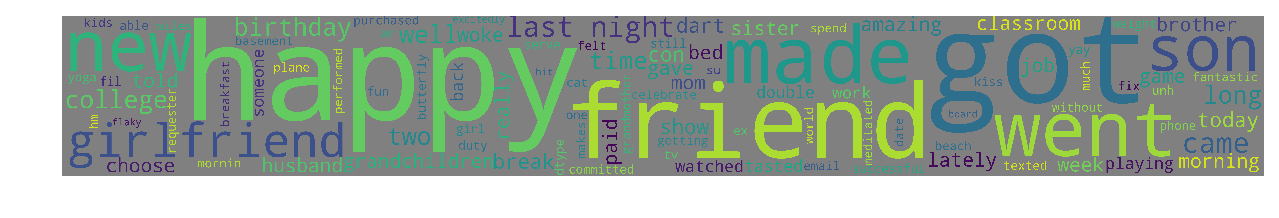

In [227]:
print(wordcloud)
fig = plt.figure(1)
fig.set_size_inches(15.5, 7.5)
#fig.savefig('test2png.png', dpi=100)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()